# Med-NCA: Robust and Lightweight Segmentation with Neural Cellular Automata 
### John Kalkhof, Camila González, Anirban Mukhopadhyay
__https://arxiv.org/pdf/2302.03473.pdf__



***

## __The Backbone Model__
<div>
<img src="src/images/model_MedNCA.png" width="600"/>
</div>

## _1. Imports_

In [1]:
import torch
from src.datasets.Nii_Gz_Dataset_3D import Dataset_NiiGz_3D
from src.models.Model_BackboneNCA import BackboneNCA
from src.losses.LossFunctions import DiceBCELoss
from src.utils.Experiment import Experiment
from src.agents.Agent_Med_NCA import Agent_Med_NCA

## _2. Configure experiment_
- __AutoReload__
    - If an experiment already exists in _model\_path_ the config will __always__ be overwritten with the existing one
    - Additionally if the model has been saved previously, this state will be reloaded
- Download _prostate_ data from 'http://medicaldecathlon.com/' and adapt 'img_path' and 'label_path'

In [2]:
import shutil
model_path = r'Models/Med_NCA_mono_knee'

config = [{
    'img_path': r"/home/alvin/UltrAi/ai-pocus/state_of_the_art_models/nnunet/knee_cartilage/phase_info_experiments/nnUNet_raw/Dataset070_Clarius_L15/imagesTr/",
    'label_path': r"/home/alvin/UltrAi/ai-pocus/state_of_the_art_models/nnunet/knee_cartilage/phase_info_experiments/nnUNet_raw/Dataset070_Clarius_L15/labelsTr/",
    'model_path': model_path,
    'device':"cuda:0",
    'unlock_CPU': True,
    # Optimizer
    'lr': 1e-4,
    'lr_gamma': 0.9999,
    'betas': (0.5, 0.5),
    # Training
    'save_interval': 10,
    'evaluate_interval': 10,
    'n_epoch': 1000,
    'batch_size': 1,
    # Model
    'channel_n': 32,        # Number of CA state channels
    'inference_steps': 64,
    'cell_fire_rate': 0.5,
    'input_channels': 1,
    'output_channels': 1,
    'hidden_size': 128,
    'train_model':1,
    # Data
    'input_size': [(64, 64), (256, 256)],
    'data_split': [0.7, 0, 0.3],
    'monogenic': True,
}
]

## _3. Choose architecture, dataset and training agent_

- _Dataset\_Nii\_Gz\_3D_ loads 3D files. If you pass a _slice_ it will be split along the according axis.

In [3]:
from src.models.phase_asymmono import PhaseAsymmono2D

dataset = Dataset_NiiGz_3D(slice=2)
device = torch.device(config[0]['device'])
ca1 = BackboneNCA(config[0]['channel_n'], config[0]['cell_fire_rate'], device, hidden_size=config[0]['hidden_size'], input_channels=config[0]['input_channels']).to(device)
ca2 = BackboneNCA(config[0]['channel_n'], config[0]['cell_fire_rate'], device, hidden_size=config[0]['hidden_size'], input_channels=config[0]['input_channels']).to(device)
mono = PhaseAsymmono2D(nscale=1, return_phase=True).to(device)
ca = [ca1, ca2]
agent = Agent_Med_NCA(ca, mono)
exp = Experiment(config, dataset, ca, agent)
dataset.set_experiment(exp)
exp.set_model_state('train')
data_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=exp.get_from_config('batch_size'))

loss_function = DiceBCELoss() 

KeyboardInterrupt: 

## _4. Run training_

Epoch: 1


  0%|          | 0/115 [00:00<?, ?it/s]

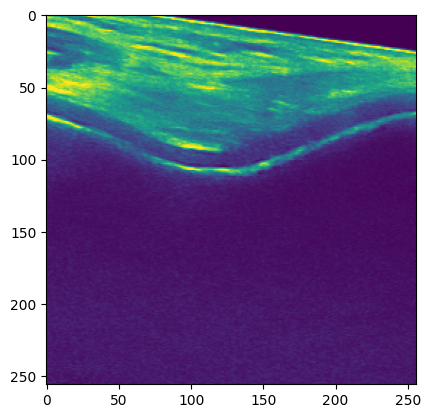

inside monogenic


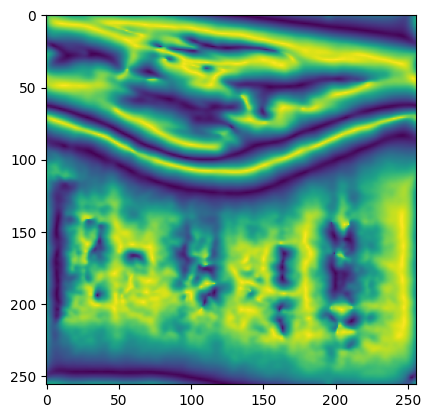

  1%|          | 1/115 [00:00<01:44,  1.09it/s]

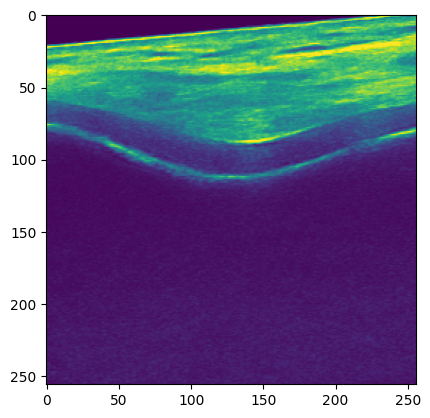

inside monogenic


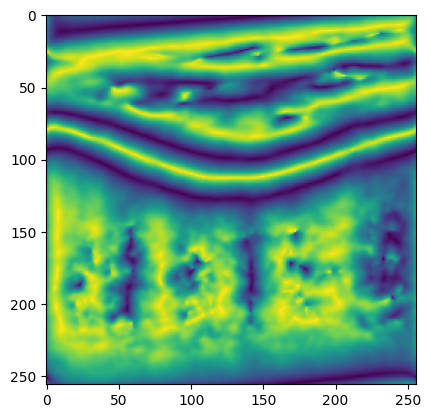

  2%|▏         | 2/115 [00:01<01:04,  1.75it/s]

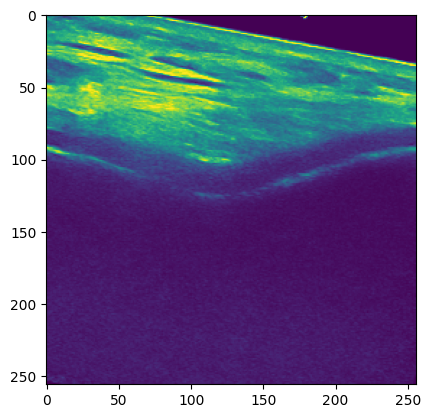

inside monogenic


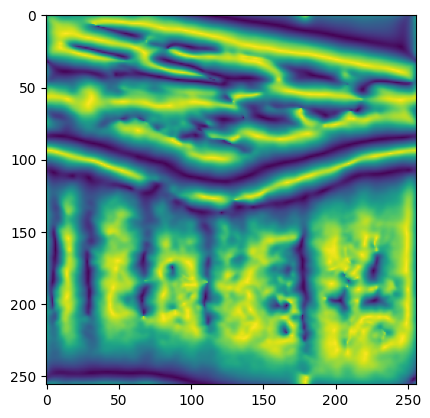

  3%|▎         | 3/115 [00:01<00:53,  2.08it/s]

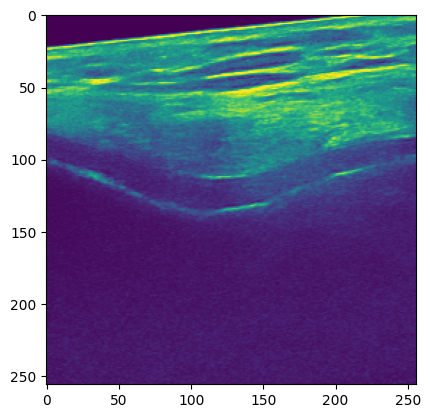

inside monogenic


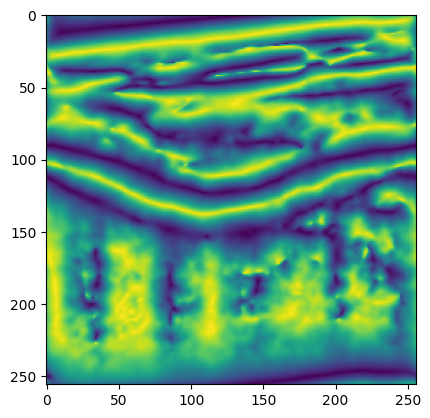

  3%|▎         | 4/115 [00:01<00:47,  2.33it/s]

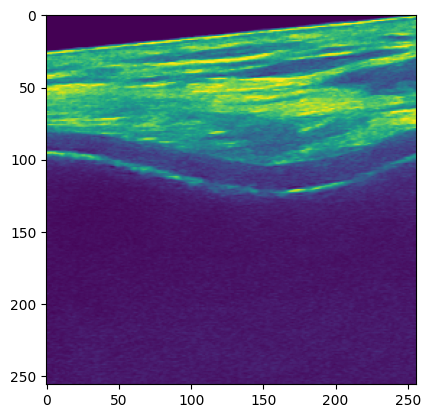

inside monogenic


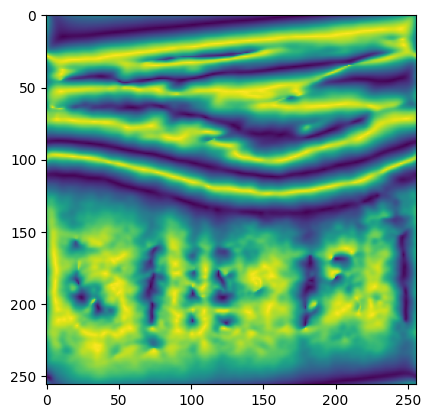

  4%|▍         | 5/115 [00:02<00:53,  2.06it/s]


KeyboardInterrupt: 

In [4]:
agent.train(data_loader, loss_function)

## _5. Evaluate test data_

In [1]:
agent.getAverageDiceScore()

NameError: name 'agent' is not defined

In [15]:
agent.model[0].mono.get_params()

{'nscale': 1,
 'self.max_wl': 128.0,
 'wls': [56.40286636352539],
 'sigmaonf': 0.4273082911968231,
 'trainable': True,
 'return_phase': True,
 'return_phase_asym': False,
 'return_ori': False,
 'return_input': False,
 'self.cut_off': 0.4,
 'self.g': 10,
 'self.T': 0}